In [1]:
# BRIEF(Binary Robust Independent Elementary Features)

In [2]:
# Install a pip package in the current Jupyter kernel
# use this if some cv2 features are not working in the notebook
import sys
!{sys.executable} -m pip install opencv-contrib-python

In [3]:
# Import resources and display image
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# Loading the image
image1 = cv2.imread("C:/Users/HY/Downloads/BRIEF.jpg")

# Converting the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Converting the training image to gray scale
training_grayscale = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Creating test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_grayscale = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)


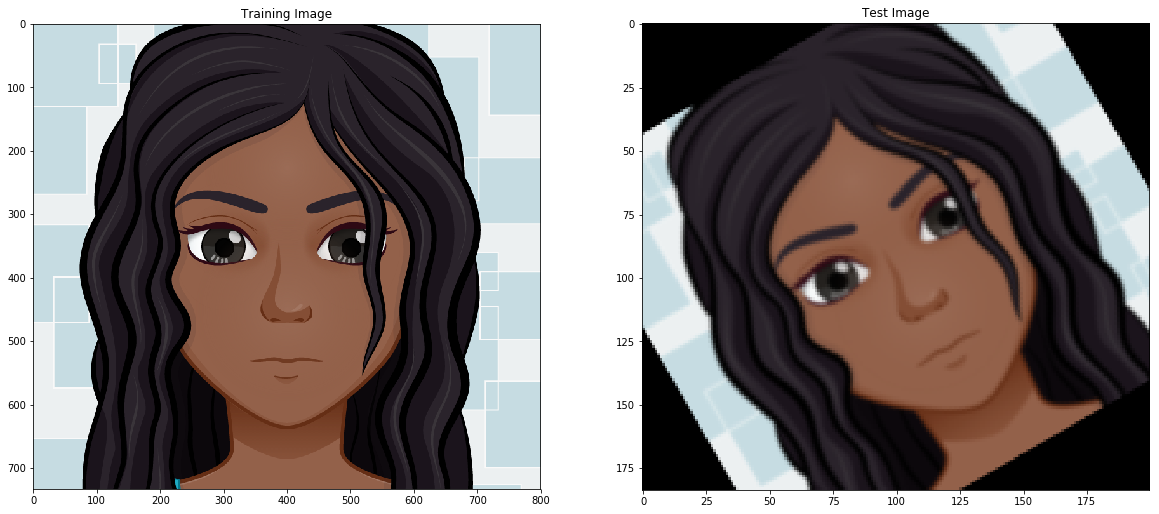

In [5]:
# Displaying traning image and test image
fx, plots = plt.subplots(1, 2, figsize=(20,30))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Test Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image: 335
Number of Keypoints Detected In The Query Image: 108


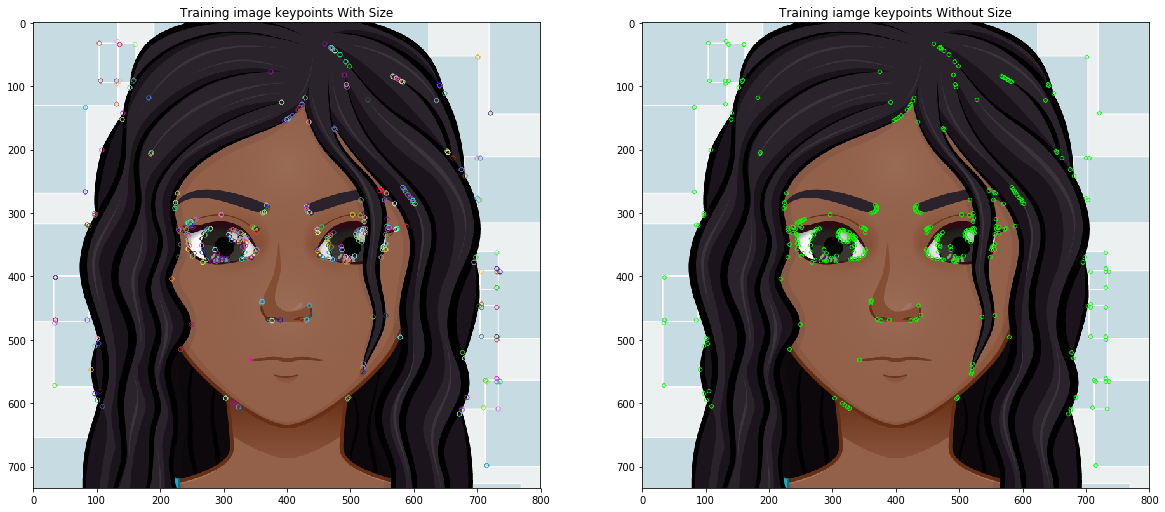

In [6]:
# Detecting keypoints and Creating Descriptor
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

training_keypoints = fast.detect(training_grayscale, None)
test_keypoints = fast.detect(test_grayscale, None)

training_keypoints, train_descriptor = brief.compute(training_grayscale, training_keypoints)
test_keypoints, test_descriptor = brief.compute(test_grayscale, test_keypoints)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, training_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, training_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Displaying image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training image keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Training iamge keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Printing the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image:", len(training_keypoints))

# Printing the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image:", len(test_keypoints))


In [7]:
# Creating a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the BRIEF descriptors of the training image and the test image
matching_points = bf.match(train_descriptor, test_descriptor)

# The matching_points with shorter distance are the ones we want.
matching_points = sorted(matching_points, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, training_keypoints, test_grayscale, test_keypoints, matching_points, test_grayscale, flags = 2)


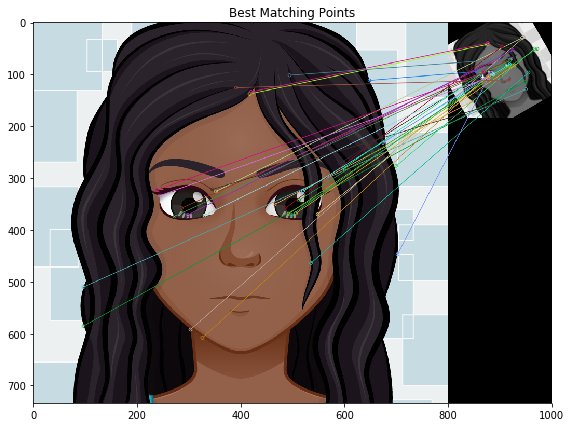


Number of Matching Keypoints Between The Training and Query Images: 32


In [8]:
# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Printing total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images:", len(matching_points))